- Stuent Name: Giacomo Govoni
- Studdent Number: XXXXXXXX
- Course: MSc Space Science and Technology

# Task - 2
## Data Cleaning and Analysis


In [ ]:
from ipywidgets import interact
# from json import loads
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from pathlib import Path
from datetime import datetime
import time
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

In [74]:
subreddits = ['r/popular' , 'r/space', 'r/cats']
sorts = ['hot', 'top', 'controversial', 'gilded']
res_data = {}


## Analysis of the Popular Subreddit

Popular 'Subreddit' is not a subreddit per se, but rather a page where all the highly upvoted posts can be seen here. 

In [75]:
subreddit = 'popular'
sort = 'top'

with open(f'raw/r/{subreddit}-{sort}.json', 'r') as f:
    res_data = json.load(f)




df = pd.DataFrame()
df_about = pd.DataFrame()
b = pd.DataFrame()


if sort != 'about':
    for post in res_data['data']['children']:
        # print(post)
        df = df.append({
            'subreddit': post['data']['subreddit'],
            'title': post['data']['title'],
            'selftext': post['data']['selftext'],
            'upvote_ratio': post['data']['upvote_ratio'],
            'ups': post['data']['ups'],
            'downs': post['data']['downs'],
            'score': post['data']['score'],
            'author_premium': post['data']['author_premium'],
            'author_fullname': post['data']['author_fullname'],
            'is_original_content' : post['data']['is_original_content']
            
        }, ignore_index = True)
elif sort == 'about':
    # for post in res_data:
    #     print(post)
    df = df.append({
        'subreddit': res_data['data']['display_name_prefixed'],
        'subscribers': res_data['data']['subscribers'],
        'created_utc': res_data['data']['created_utc'],
        'public_description': res_data['data']['public_description'],
        'primary_color': res_data['data']['primary_color'],
        'user_is_subscriber': res_data['data']['user_is_subscriber'],
        
    }, ignore_index = True)
    
# b = b.append(df.pivot_table(columns = ['subreddit'], aggfunc='size'), ignore_index = True)
# b = df.pivot_table(columns = ['subreddit'], aggfunc='size')
df

# df.sort_values(by=['subreddit'])
# c = b.sort_values(ascending=False)

,author_fullname,author_premium,downs,is_original_content,score,selftext,subreddit,title,ups,upvote_ratio
0,t2_90l1xu04,0.0,0.0,0.0,107996.0,,meirl,meirl,107996.0,0.91
1,t2_5v2qv,0.0,0.0,0.0,90152.0,,wholesomememes,Sounds like a nice place to work 🫕,90152.0,0.95
2,t2_3ovw7qc2,1.0,0.0,0.0,83959.0,,nextfuckinglevel,Iran: defying the mullahs no turban is safe.,83959.0,0.78
3,t2_4g57yzjl,1.0,0.0,0.0,71535.0,,interestingasfuck,Cutting and trying 550 day old dry aged prime ...,71535.0,0.82
4,t2_bfqha5ih,0.0,0.0,0.0,69306.0,,Damnthatsinteresting,South Pole morning,69306.0,0.95
...,...,...,...,...,...,...,...,...,...,...
95,t2_8kafd7h6,0.0,0.0,0.0,18737.0,,AbsoluteUnits,Absolute unit of a baby,18737.0,0.97
96,t2_67nmx,0.0,0.0,0.0,18755.0,,PeopleFuckingDying,bAbY DeVoUrEd By ShArK,18755.0,0.97
97,t2_pad04bo4,0.0,0.0,0.0,19129.0,,FunnyAnimals,Only 1 brain cell between these 2.,19129.0,0.95
98,t2_3yv2rb,0.0,0.0,0.0,19475.0,,PoliticalHumor,Im voting straight Democrat because the GOP ar...,19475.0,0.85


In the top 100 popular posts ther are 64 unique subreddits! That means very few subreddits break the Top 100 leaderboard.

In [76]:
print(df['subreddit'].nunique())
print(df['subreddit'].unique())


70
['meirl' 'wholesomememes' 'nextfuckinglevel' 'interestingasfuck'
 'Damnthatsinteresting' 'WhitePeopleTwitter' 'todayilearned' 'aww'
 'Funnymemes' 'CasualUK' 'politics' 'cats' 'BrandNewSentence' 'WorkReform'
 'worldnews' 'PublicFreakout' 'IdiotsInCars' 'Unexpected' 'gaming'
 'therewasanattempt' 'entertainment' 'oddlysatisfying' 'pics' 'funny'
 'nba' 'memes' 'WatchPeopleDieInside' 'baseball' 'rareinsults'
 'pcmasterrace' 'OldSchoolCool' 'trippinthroughtime' 'MadeMeSmile'
 'tumblr' 'ContagiousLaughter' 'LeopardsAteMyFace' 'SelfAwarewolves'
 'news' 'texas' 'BeAmazed' 'Awwducational' 'SweatyPalms' 'PoliticalHumor'
 'ProgrammerHumor' 'HumansBeingBros' 'mildlyinteresting' 'likeus'
 'AnimalsBeingBros' 'JustGuysBeingDudes' 'MovieDetails' 'HolUp'
 'CrazyFuckingVideos' 'facepalm' 'confidentlyincorrect'
 'perfectlycutscreams' 'MurderedByWords' 'spaceporn' 'lotrmemes' 'comics'
 'antiwork' 'KidsAreFuckingStupid' 'WinStupidPrizes' 'gifs'
 'instant_regret' 'technicallythetruth' 'dndmemes' 'rarepupp

The first plot is against the first 100 posts and upvotes. This shows the upvotes greater than 60k is very rare in popular.

Text(0.5, 1.0, 'Upvotes for the first 100 posts in r/popular')

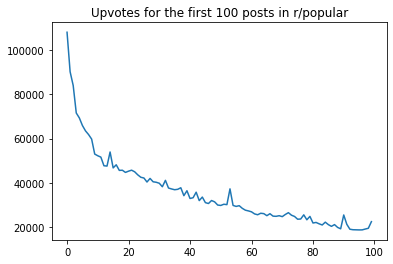

In [77]:
plt.plot(range(len(df['score'])), df['score'])
plt.title("Upvotes for the first 100 posts in r/popular")


In the following plot the upvote ratio is plotted for the posts in r/popular. Apart from one anomaly most of the posts here have the ratio in he ballpark  of 0.95 to 0.75.

Text(0.5, 1.0, 'Upvote Ratio for the first 100 posts in r/popular')

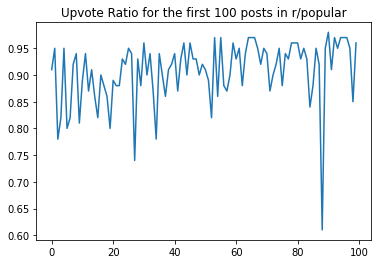

In [78]:
plt.plot(range(len(df['upvote_ratio'])), df['upvote_ratio'])
plt.title("Upvote Ratio for the first 100 posts in r/popular")

## Analysing the data for aforementioned subreddits.
For this the subreddits are stored in an empty nested dictionary so that once collected the data is stored in an conveniently readable format. Then it is looped over it and the corresponding values are stored in there 


In [79]:
subreddits = ['r/space', 'r/cats', 'r/music', 'r/books', 'r/sports', 'r/tech', 'r/hadesthegame', 'r/lifeprotips', 'r/meirl']
sorts = ['hot', 'top', 'controversial', 'about']
res_data_comp = {'r/space':{'about': {}, 'hot': {}, 'top': {}, 'controversial': {}, 'glided': {}}, 
                 'r/cats': {'about': {}, 'hot': {}, 'top': {}, 'controversial': {}, 'glided': {}}, 
                 'r/music': {'about': {}, 'hot': {}, 'top': {}, 'controversial': {}, 'glided': {}}, 
                 'r/books': {'about': {}, 'hot': {}, 'top': {}, 'controversial': {}, 'glided': {}}, 
                 'r/sports': {'about': {}, 'hot': {}, 'top': {}, 'controversial': {}, 'glided': {}}, 
                 'r/tech': {'about': {}, 'hot': {}, 'top': {}, 'controversial': {}, 'glided': {}},
                 'r/hadesthegame': {'about': {}, 'hot': {}, 'top': {}, 'controversial': {}, 'glided': {}},
                 'r/lifeprotips': {'about': {}, 'hot': {}, 'top': {}, 'controversial': {}, 'glided': {}},
                 'r/meirl': {'about': {}, 'hot': {}, 'top': {}, 'controversial': {}, 'glided': {}},
                 'r/all': {'about': {}, 'hot': {}, 'top': {}, 'controversial': {}, 'glided': {}},
                 'r/popular': {'about': {}, 'hot': {}, 'top': {}, 'controversial': {}, 'glided': {}},       
                 }

for subred in subreddits:
    for sor in sorts:
        with open(f'raw/{subred}-{sor}.json', 'r') as f:
            res_data_comp[f'{subred}'][f'{sor}'] |= json.load(f)

The stored values are then bought into the pandas dataframe. With this, a over 200k lines of jsonn file got converted in a table with lines just under 2000. 

In [80]:
df = pd.DataFrame()
df_about = pd.DataFrame()
b = pd.DataFrame()

for subred in subreddits:
    for sor in sorts:
        if sor != 'about':
            for post in res_data_comp[f'{subred}'][f'{sor}']['data']['children']:
                df = df.append({
                    'Subreddit': post['data']['subreddit'],
                    'Title': post['data']['title'],
                    'Self Text': post['data']['selftext'],
                    'Upvote Ratio': post['data']['upvote_ratio'],
                    'Up Votes': post['data']['ups'],
                    'Down Votes': post['data']['downs'],
                    'Score': post['data']['score'],

                }, ignore_index = True)
        elif sor == 'about':
            df_about = df_about.append({
                'Subreddit': res_data_comp[f'{subred}'][f'{sor}']['data']['display_name_prefixed'],
                'Total Subscribers': res_data_comp[f'{subred}'][f'{sor}']['data']['subscribers'],
                'Time of Post Created in UTC': res_data_comp[f'{subred}'][f'{sor}']['data']['created_utc'],
                'Description': res_data_comp[f'{subred}'][f'{sor}']['data']['public_description'],
                'Primary Color': res_data_comp[f'{subred}'][f'{sor}']['data']['primary_color'],
                'Am I subscribed': res_data_comp[f'{subred}'][f'{sor}']['data']['user_is_subscriber'],
                
            }, ignore_index = True)

df

,Down Votes,Score,Self Text,Subreddit,Title,Up Votes,Upvote Ratio
0,0.0,15.0,Please sort comments by 'new' to find question...,space,All Space Questions thread for week of October...,15.0,0.85
1,0.0,2023.0,,space,NASA Asteroid Threat Practice Drill Shows We'r...,2023.0,0.95
2,0.0,302.0,,space,Meteorite analyzed by Amir Siraj (age 22) offi...,302.0,0.86
3,0.0,328.0,,space,Researchers Make Rocket Fuel Using Actual Rego...,328.0,0.96
4,0.0,1223.0,,space,"This was over San Diego, CA driving east. Saw ...",1223.0,0.93
...,...,...,...,...,...,...,...
1831,0.0,71.0,,meirl,meirl,71.0,0.94
1832,0.0,51.0,,meirl,Meirl,51.0,0.93
1833,0.0,13863.0,,meirl,meirl,13863.0,0.97
1834,0.0,1271.0,,meirl,Meirl,1271.0,0.97


This plot shows that the amount of subscibers each subreddit has to give context of next few analysis.

Text(0.5, 1.0, 'Subredddit vs Subscribers')

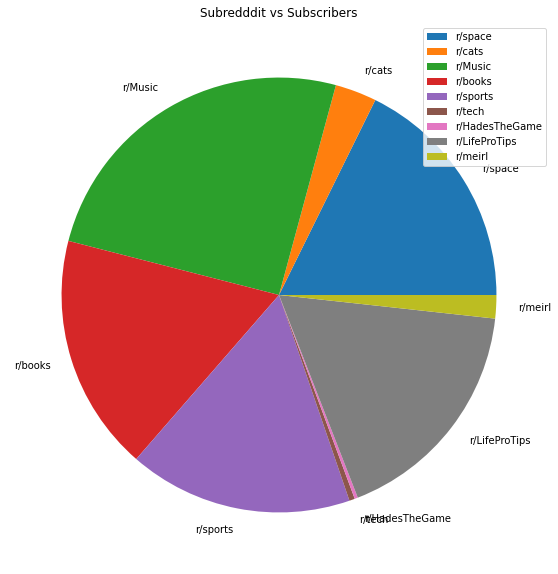

In [81]:
x = np.array(df_about['Subreddit'])
y = np.array(df_about['Total Subscribers'])
plt.figure(facecolor='white', figsize=(10, 10))
plt.pie(y, labels=x)
plt.legend()
plt.title('Subredddit vs Subscribers')

This analysis shows the upvotes each subreddit gets in general. Notice the trend in r/tech. Remember the subscribers r/tech has? It was the least one, but it dominates here. This could be because mre users are active here and are also tech enthusiasts who stay more active than others.

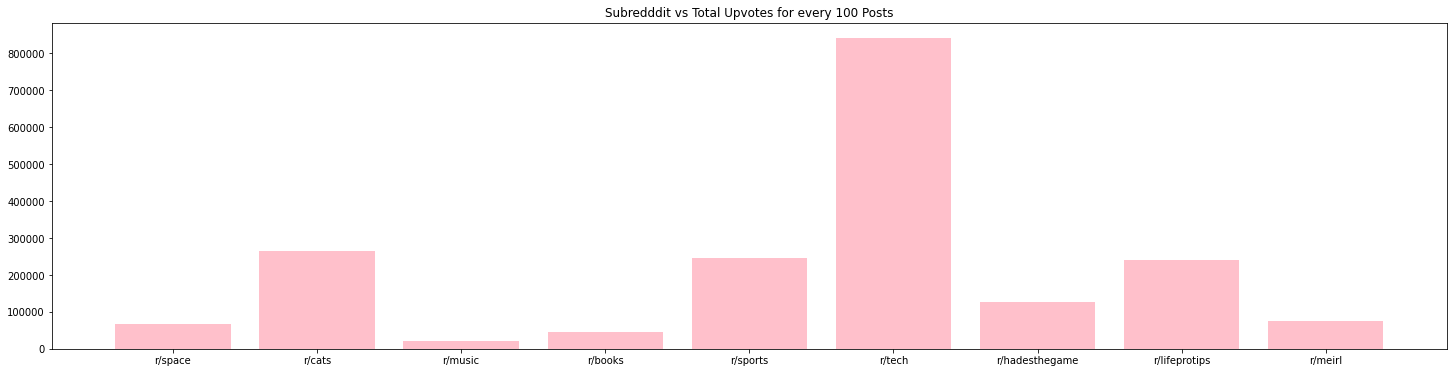

In [82]:
sums_values = df.groupby("Subreddit").sum()
x = np.array(['r/space', 'r/cats', 'r/music', 'r/books', 'r/sports', 'r/tech', 'r/hadesthegame', 'r/lifeprotips', 'r/meirl'])
# sums_values
y = np.array(sums_values['Score'])
plt.figure(figsize=(25, 6))
plt.title('Subredddit vs Total Upvotes for every 100 Posts')
plt.bar(x,y, color='pink')
plt.show()

To make the above point clear, here is the graph of the number of upvotes per subscriber so that it will be more clear about the trend discussed before. The upvotes for r/tech is more than 1.5 per post per subscriber. Compared to others. r/space is the least active or most abandoned subreddit in the pool chosen. Because of the r/tech, a log plot has been plotted in both places for others to be seen properly. 

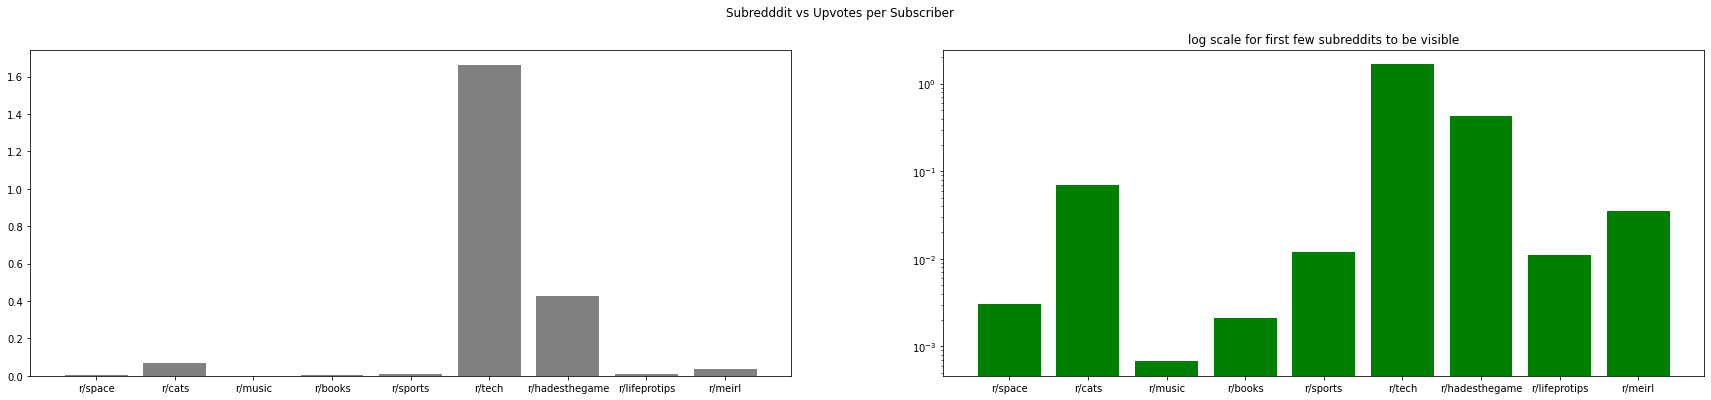

In [83]:
sums_values = df.groupby("Subreddit").sum()
x = np.array(['r/space', 'r/cats', 'r/music', 'r/books', 'r/sports', 'r/tech', 'r/hadesthegame', 'r/lifeprotips', 'r/meirl'])
# sums_values
y = np.array(sums_values['Score'])/np.array(df_about['Total Subscribers'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,6))
fig.suptitle('Subredddit vs Upvotes per Subscriber')
ax1.bar(x,y, color='grey')
ax2.bar(x,y, color='green')
ax2.set_title("log scale for first few subreddits to be visible")
ax2.set_yscale("log", nonpositive='clip')

Coming to the average upvotes r/tech is still miles ahead, but few others are not that far behind as before. This could be because of a few reasons but the most plausible one could be the number of posts being posted.

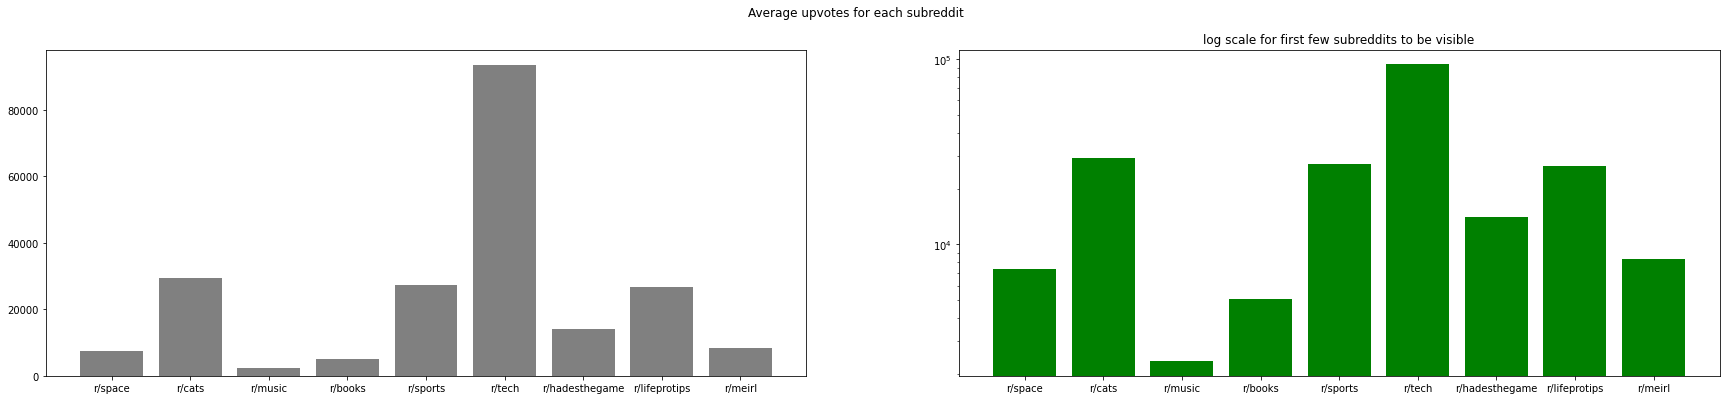

In [84]:
sums_values = df.groupby("Subreddit").sum()
x = np.array(['r/space', 'r/cats', 'r/music', 'r/books', 'r/sports', 'r/tech', 'r/hadesthegame', 'r/lifeprotips', 'r/meirl'])
# sums_values
y = np.array(sums_values['Score'])/(len(sums_values['Score']))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,6))
fig.suptitle('Average upvotes for each subreddit')
ax1.bar(x,y, color='grey')
ax2.bar(x,y, color='green')
ax2.set_title("log scale for first few subreddits to be visible")
ax2.set_yscale("log", nonpositive='clip')
    
        

## Time based search with Pushshift

I had planned to do analysis over years, but due to time restraints I am unable to. But, working on this was a joy, so I would work on this over the next few months and make more analysis(that is discussed in the next section) and keep posting it to my github

In [85]:
subreddit = 'cats'
with open(f'raw/r/cats-1640995200-1666483200.json', 'r') as f:
    res_data_pushshift = json.load(f)

# res_data_pushshift['data']
df_pushshift = pd.DataFrame()

for post in res_data_pushshift['data']:
    df_pushshift = df_pushshift.append({
        'Subreddit': post['subreddit'],
        'Title': post['title'],
        'Self Text': post['selftext'],
        'Upvote Ratio': post['upvote_ratio'],
        # 'Up Votes': post['ups'],
        # 'Down Votes': post['downs'],
        'Score': post['score'],

    }, ignore_index = True)
df_pushshift

""


## Challenges Faced

While collecting the data, knowing the required parameters using the documentation was a bit tricky at first as the API documentation of reddit was autogenerated. Once collected, choosing which data to work on and which to ignore was the next big issue as there was a lot of data. As there were lot of possibilities that meant choosing one was difficult. If I were to redo this assignment, then I would set the problem statements first and  then start with the rest. Once I have decided on a few parameters then cleaning up and storing the values in a usable data format was the longest in time as there was a lot to clean up and there were a lot of layers of arrays and dictionaries. With these two taking much more time than I anticipated, I had a lot less time to work on data analysis. Again, if I had to redo this,Then I would set specific deadlines to each part so that I would have enough time to do each part in a proper way.

## Future Scope:
One of the things I had planned but had no time to do is to do a sentiment analysis of each subreddit’s top 1000 posts’ title and comments and see how they correlate to other factors such as the upvote ratio, active subscribers, and user base demographic, and geographic data. And with push shift data, see how the subreddit has changed over time, in terms of reach, their contribution, and if they have become more positive or negative. There is also the possibility to see a specific user post history. A similar analysis also could be done.
